In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WineQT.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/wine-quality-dataset",
  file_path,
)
df.head()

c:\Users\Windows11\AppData\Local\pypoetry\Cache\virtualenvs\data-science-RaKH72jV-py3.13\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Windows11\AppData\Local\Temp\ipykernel_6084\366619165.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop(['Id'], axis=1)

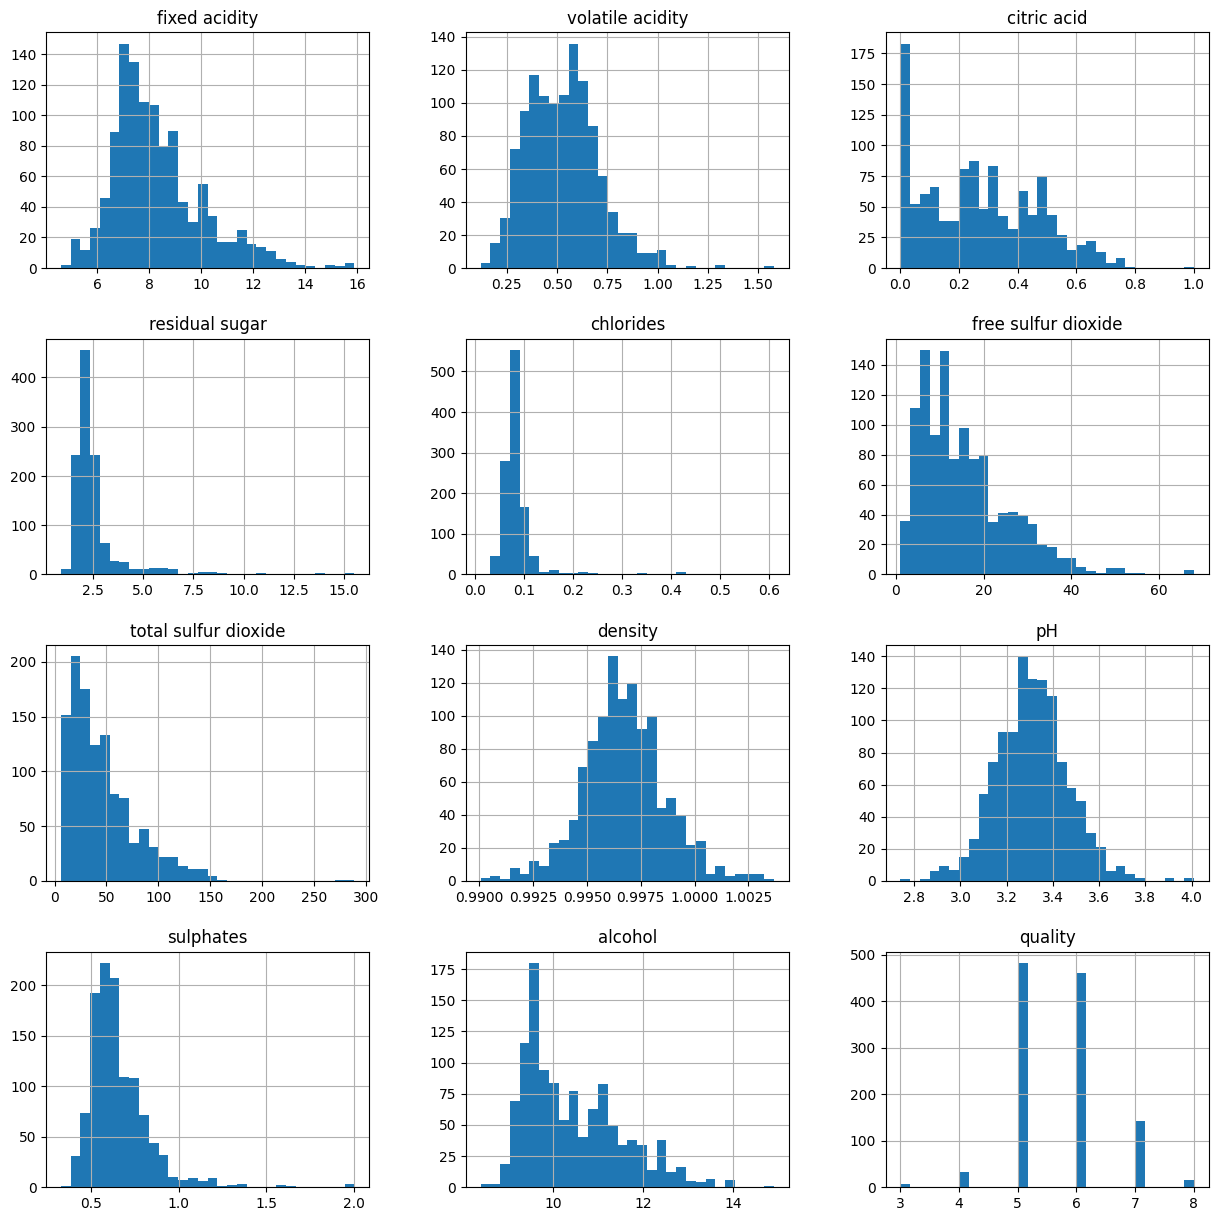

In [7]:
df.hist(bins=30, figsize=(15,15))
plt.show()

divisão estratificada manual

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=44)

X = df.drop(['quality'], axis=1)
y = df['quality']

s = sss.split(X, y)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

linha mais cabulosa possível

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),   # Não escala as labels
        ('svm', SVC())
    ]
)

from sklearn.model_selection import StratifiedKFold, GridSearchCV


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [0.001, 0.01, 0.1, 1],  
    'svm__kernel': ['rbf']        
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='accuracy',
    n_jobs=-1  # Usa todos os núcleos da CPU
)

grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

In [13]:
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor pontuação (acurácia) do GridSearch: {grid_search.best_score_:.4f}")

Melhores parâmetros encontrados: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Melhor pontuação (acurácia) do GridSearch: 0.6273


sistema por votação e tudo mais

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

In [ ]:
# Devem ser tunados individualmente
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Pra evitar pipeline
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# os 3 batendo +- 55%

DecisionTreeClassifier()

In [28]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

vc = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('dt', dt)],
    voting='soft'
)

voting_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('voting', vc)
    ]
)

voting_pipeline.fit(X_train, y_train)
voting_pipeline.score(X_test, y_test)

0.5664335664335665